In [1]:
import pandas as pd
import ast

In [2]:
df = pd.read_csv('./data/recipies/RAW_recipes.csv')
df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [3]:
df['nutrition'] = df['nutrition'].apply(lambda x: ast.literal_eval(x))
df['steps'] = df['steps'].apply(lambda x: ast.literal_eval(x))
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))
df['ingredients'] = df['ingredients'].apply(lambda x: ast.literal_eval(x))

In [4]:
df['nutrition'] = df['nutrition'].apply(lambda x: x if isinstance(x, list) and len(x) == 7 else [0] * 7)

In [5]:
columns = [
    "calories",
    "total_fat_PDV",
    "sugar_PDV",
    "sodium_PDV",
    "protein_PDV",
    "saturated_fat_PDV",
    "carbohydrates_PDV",
]

nutrition_df = pd.DataFrame(df['nutrition'].to_list(), columns=columns)

In [6]:
df = pd.concat([df, nutrition_df], axis=1)

In [7]:
df = df.drop(columns=['nutrition'])
df

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat_PDV,sugar_PDV,sodium_PDV,protein_PDV,saturated_fat_PDV,carbohydrates_PDV
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...",11,[place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"[ham, 60-minutes-or-less, time-to-make, course...",7,"[heat oil in a 4-quart dutch oven, add celery ...",this is a delicious soup that i originally fou...,"[celery, onion, green sweet pepper, garlic clo...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"[15-minutes-or-less, time-to-make, course, pre...",1,[mix all ingredients together thoroughly],this spice mix will make your taste buds dance!,"[paprika, salt, garlic powder, onion powder, d...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"[60-minutes-or-less, time-to-make, course, mai...",7,"[in a bowl , combine the mashed yolks and mayo...","deviled eggs, cajun-style","[hard-cooked eggs, mayonnaise, dijon mustard, ...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"[30-minutes-or-less, time-to-make, course, pre...",9,[place melted butter in a large mixing bowl an...,"i've heard of the 'cookies by design' company,...","[butter, eagle brand condensed milk, light bro...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0


In [8]:
df['steps_processed'] = df['steps'].apply(lambda x:"\n".join([f"{i + 1}. {step}" for i, step in enumerate(x)]))
df['ingredients_processed'] = df['ingredients'].apply(lambda x:"\n".join([f"{i + 1}. {step}" for i, step in enumerate(x)]))
df

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat_PDV,sugar_PDV,sodium_PDV,protein_PDV,saturated_fat_PDV,carbohydrates_PDV,steps_processed,ingredients_processed
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,1. make a choice and proceed with recipe\n2. d...,1. winter squash\n2. mexican seasoning\n3. mix...
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,1. preheat oven to 425 degrees f\n2. press dou...,1. prepared pizza crust\n2. sausage patty\n3. ...
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,1. brown ground beef in large pot\n2. add chop...,1. ground beef\n2. yellow onions\n3. diced tom...
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...",11,[place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,1. place potatoes in a large pot of lightly sa...,1. spreadable cheese with garlic and herbs\n2....
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,1. mix all ingredients& boil for 2 1 / 2 hours...,1. tomato juice\n2. apple cider vinegar\n3. su...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"[ham, 60-minutes-or-less, time-to-make, course...",7,"[heat oil in a 4-quart dutch oven, add celery ...",this is a delicious soup that i originally fou...,"[celery, onion, green sweet pepper, garlic clo...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,1. heat oil in a 4-quart dutch oven\n2. add ce...,1. celery\n2. onion\n3. green sweet pepper\n4....
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"[15-minutes-or-less, time-to-make, course, pre...",1,[mix all ingredients together thoroughly],this spice mix will make your taste buds dance!,"[paprika, salt, garlic powder, onion powder, d...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1. mix all ingredients together thoroughly,1. paprika\n2. salt\n3. garlic powder\n4. onio...
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"[60-minutes-or-less, time-to-make, course, mai...",7,"[in a bowl , combine the mashed yolks and mayo...","deviled eggs, cajun-style","[hard-cooked eggs, mayonnaise, dijon mustard, ...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,"1. in a bowl , combine the mashed yolks and ma...",1. hard-cooked eggs\n2. mayonnaise\n3. dijon m...
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"[30-minutes-or-less, time-to-make, course, pre...",9,[place melted butter in a large mixing bowl an...,"i've heard of the 'cookies by design' company,...","[butter, eagle brand condensed milk, light bro...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,1. place melted butter in a large mixing bowl ...,1. butter\n2. eagle brand condensed milk\n3. l...


In [9]:
df['full_recipe'] = "Name: "+ df['name'] + \
    "\nNutitions: "+ df['calories'].astype(str) + " calories, " + df['total_fat_PDV'].astype(str) + " total fat, "+ df['sugar_PDV'].astype(str) + " sugar, "+ df['sodium_PDV'].astype(str) + \
    " sodium, " + df["protein_PDV"].astype(str) + " protein, "+ df['saturated_fat_PDV'].astype(str) + " saturated fat, " + df['carbohydrates_PDV'].astype(str) + \
     " carbohydrates." + "\nIngridients: \n" + df['ingredients_processed'] + "\n Cooking steps: \n" + df['steps_processed']

In [10]:
model_df = df[['name','submitted', 'calories', 'tags', 'total_fat_PDV', 'sugar_PDV', 'sodium_PDV', 'protein_PDV',
       'saturated_fat_PDV', 'carbohydrates_PDV', 'steps_processed',
       'ingredients_processed', 'full_recipe']]

In [11]:
model_df = model_df.reset_index(drop=True)

#### Outliers removal

##### Calories

In [12]:
model_df['calories'].median(), model_df['calories'].mean()

(np.float64(313.4), np.float64(473.9424245694772))

In [13]:
model_df = model_df[model_df['calories'] != 0]

In [14]:
from scipy import stats
import numpy as np

<Axes: >

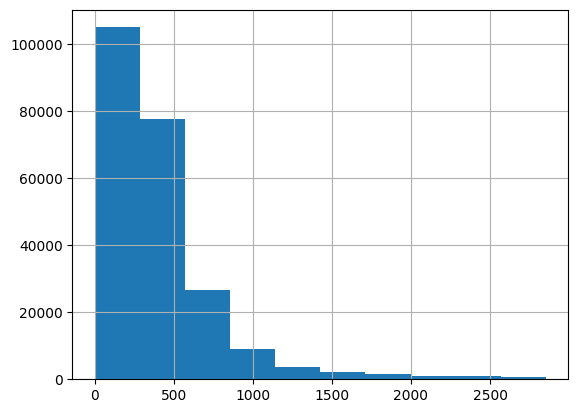

In [15]:
z = np.abs(stats.zscore(model_df['calories']))

outliers = model_df.index[z > 2]

no_outliers = model_df.drop(index=outliers)

no_outliers['calories'].hist()

In [16]:
# removing drinks and outlied dished
no_outliers = no_outliers[no_outliers['calories'] >= 20]
no_outliers

,name,submitted,calories,tags,total_fat_PDV,sugar_PDV,sodium_PDV,protein_PDV,saturated_fat_PDV,carbohydrates_PDV,steps_processed,ingredients_processed,full_recipe
0,arriba baked winter squash mexican style,2005-09-16,51.5,"[60-minutes-or-less, time-to-make, course, mai...",0.0,13.0,0.0,2.0,0.0,4.0,1. make a choice and proceed with recipe\n2. d...,1. winter squash\n2. mexican seasoning\n3. mix...,Name: arriba baked winter squash mexican sty...
1,a bit different breakfast pizza,2002-06-17,173.4,"[30-minutes-or-less, time-to-make, course, mai...",18.0,0.0,17.0,22.0,35.0,1.0,1. preheat oven to 425 degrees f\n2. press dou...,1. prepared pizza crust\n2. sausage patty\n3. ...,Name: a bit different breakfast pizza\nNutiti...
2,all in the kitchen chili,2005-02-25,269.8,"[time-to-make, course, preparation, main-dish,...",22.0,32.0,48.0,39.0,27.0,5.0,1. brown ground beef in large pot\n2. add chop...,1. ground beef\n2. yellow onions\n3. diced tom...,Name: all in the kitchen chili\nNutitions: 26...
3,alouette potatoes,2003-04-14,368.1,"[60-minutes-or-less, time-to-make, course, mai...",17.0,10.0,2.0,14.0,8.0,20.0,1. place potatoes in a large pot of lightly sa...,1. spreadable cheese with garlic and herbs\n2....,Name: alouette potatoes\nNutitions: 368.1 cal...
4,amish tomato ketchup for canning,2002-10-25,352.9,"[weeknight, time-to-make, course, main-ingredi...",1.0,337.0,23.0,3.0,0.0,28.0,1. mix all ingredients& boil for 2 1 / 2 hours...,1. tomato juice\n2. apple cider vinegar\n3. su...,Name: amish tomato ketchup for canning\nNuti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231631,zydeco shrimp wrap,2006-10-03,482.6,"[60-minutes-or-less, time-to-make, course, mai...",13.0,25.0,37.0,33.0,9.0,27.0,1. bring 3 quarts salted to water to a boil\n2...,1. white rice\n2. vegetable oil\n3. onion\n4. ...,Name: zydeco shrimp wrap\nNutitions: 482.6 cal...
231632,zydeco soup,2012-08-29,415.2,"[ham, 60-minutes-or-less, time-to-make, course...",26.0,34.0,26.0,44.0,21.0,15.0,1. heat oil in a 4-quart dutch oven\n2. add ce...,1. celery\n2. onion\n3. green sweet pepper\n4....,"Name: zydeco soup\nNutitions: 415.2 calories, ..."
231634,zydeco ya ya deviled eggs,2008-06-07,59.2,"[60-minutes-or-less, time-to-make, course, mai...",6.0,2.0,3.0,6.0,5.0,0.0,"1. in a bowl , combine the mashed yolks and ma...",1. hard-cooked eggs\n2. mayonnaise\n3. dijon m...,Name: zydeco ya ya deviled eggs\nNutitions: 59...
231635,cookies by design cookies on a stick,2008-04-15,188.0,"[30-minutes-or-less, time-to-make, course, pre...",11.0,57.0,11.0,7.0,21.0,9.0,1. place melted butter in a large mixing bowl ...,1. butter\n2. eagle brand condensed milk\n3. l...,Name: cookies by design cookies on a stick\n...


#### other stats outliers

In [17]:
no_outliers = no_outliers[(np.abs(stats.zscore(no_outliers[['total_fat_PDV', 'sugar_PDV', 'sodium_PDV',
       'protein_PDV', 'saturated_fat_PDV', 'carbohydrates_PDV']])) < 3).all(axis=1)]


In [18]:
no_outliers.shape

(212134, 13)

In [19]:
model_df = no_outliers.copy()

In [20]:
print(model_df.isnull().sum())

name                     0
submitted                0
calories                 0
tags                     0
total_fat_PDV            0
sugar_PDV                0
sodium_PDV               0
protein_PDV              0
saturated_fat_PDV        0
carbohydrates_PDV        0
steps_processed          0
ingredients_processed    0
full_recipe              0
dtype: int64


In [21]:
model_df['ingredients_processed'] = model_df['ingredients_processed'].str.lower().str.strip()

# Removing special characters
model_df['steps_processed'] = model_df['steps_processed'].str.replace(r'[^\w\s]', '', regex=True)

In [22]:
# Convert all non-string values to an empty string
model_df['tags'] = model_df['tags'].apply(lambda x: str(x) if not isinstance(x, str) else x)


In [23]:
model_df['tags'] = model_df['tags'].apply(lambda x: [tag.strip().lower().replace(' ', '_').replace('-', " ") for tag in eval(x)])


In [24]:
model_df = model_df.drop_duplicates(subset=['name', 'ingredients_processed'])


In [25]:
model_df =model_df.reset_index(drop=True)

In [26]:
model_df = model_df.drop([3072])

In [27]:
model_df['submitted'] = pd.to_datetime(model_df['submitted'])
model_df['month_year'] = model_df['submitted'].dt.to_period('M')
model_df

,name,submitted,calories,tags,total_fat_PDV,sugar_PDV,sodium_PDV,protein_PDV,saturated_fat_PDV,carbohydrates_PDV,steps_processed,ingredients_processed,full_recipe,month_year
0,arriba baked winter squash mexican style,2005-09-16,51.5,"[60 minutes or less, time to make, course, mai...",0.0,13.0,0.0,2.0,0.0,4.0,1 make a choice and proceed with recipe\n2 dep...,1. winter squash\n2. mexican seasoning\n3. mix...,Name: arriba baked winter squash mexican sty...,2005-09
1,a bit different breakfast pizza,2002-06-17,173.4,"[30 minutes or less, time to make, course, mai...",18.0,0.0,17.0,22.0,35.0,1.0,1 preheat oven to 425 degrees f\n2 press dough...,1. prepared pizza crust\n2. sausage patty\n3. ...,Name: a bit different breakfast pizza\nNutiti...,2002-06
2,all in the kitchen chili,2005-02-25,269.8,"[time to make, course, preparation, main dish,...",22.0,32.0,48.0,39.0,27.0,5.0,1 brown ground beef in large pot\n2 add choppe...,1. ground beef\n2. yellow onions\n3. diced tom...,Name: all in the kitchen chili\nNutitions: 26...,2005-02
3,alouette potatoes,2003-04-14,368.1,"[60 minutes or less, time to make, course, mai...",17.0,10.0,2.0,14.0,8.0,20.0,1 place potatoes in a large pot of lightly sal...,1. spreadable cheese with garlic and herbs\n2....,Name: alouette potatoes\nNutitions: 368.1 cal...,2003-04
4,amish tomato ketchup for canning,2002-10-25,352.9,"[weeknight, time to make, course, main ingredi...",1.0,337.0,23.0,3.0,0.0,28.0,1 mix all ingredients boil for 2 1 2 hours o...,1. tomato juice\n2. apple cider vinegar\n3. su...,Name: amish tomato ketchup for canning\nNuti...,2002-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212119,zydeco shrimp wrap,2006-10-03,482.6,"[60 minutes or less, time to make, course, mai...",13.0,25.0,37.0,33.0,9.0,27.0,1 bring 3 quarts salted to water to a boil\n2 ...,1. white rice\n2. vegetable oil\n3. onion\n4. ...,Name: zydeco shrimp wrap\nNutitions: 482.6 cal...,2006-10
212120,zydeco soup,2012-08-29,415.2,"[ham, 60 minutes or less, time to make, course...",26.0,34.0,26.0,44.0,21.0,15.0,1 heat oil in a 4quart dutch oven\n2 add celer...,1. celery\n2. onion\n3. green sweet pepper\n4....,"Name: zydeco soup\nNutitions: 415.2 calories, ...",2012-08
212121,zydeco ya ya deviled eggs,2008-06-07,59.2,"[60 minutes or less, time to make, course, mai...",6.0,2.0,3.0,6.0,5.0,0.0,1 in a bowl combine the mashed yolks and mayo...,1. hard-cooked eggs\n2. mayonnaise\n3. dijon m...,Name: zydeco ya ya deviled eggs\nNutitions: 59...,2008-06
212122,cookies by design cookies on a stick,2008-04-15,188.0,"[30 minutes or less, time to make, course, pre...",11.0,57.0,11.0,7.0,21.0,9.0,1 place melted butter in a large mixing bowl a...,1. butter\n2. eagle brand condensed milk\n3. l...,Name: cookies by design cookies on a stick\n...,2008-04


In [ ]:
model_df.sort_values(by=['month_year'])[model_df['month_year'] >= '2008-01']

C:\Users\ykuzm\AppData\Local\Temp\ipykernel_19996\123419950.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_df.sort_values(by=['month_year'])[model_df['month_year'] >= '2008-01']


,name,submitted,calories,tags,total_fat_PDV,sugar_PDV,sodium_PDV,protein_PDV,saturated_fat_PDV,carbohydrates_PDV,steps_processed,ingredients_processed,full_recipe,month_year
126332,mom s cube steak,2008-01-03,546.0,"[time to make, course, preparation, main dish,...",84.0,3.0,0.0,3.0,35.0,4.0,1 heat oil in skillet\n2 preheat oven 375\n3 s...,1. cube steaks\n2. onion\n3. flour\n4. vegetab...,Name: mom s cube steak\nNutitions: 546.0 calor...,2008-01
65569,diabetic banana split pie,2008-01-22,220.5,"[time to make, course, main ingredient, prepar...",12.0,77.0,26.0,7.0,14.0,11.0,1 mix pudding with milk and vanilla\n2 beat un...,1. reduced fat graham cracker crust\n2. sugar-...,Name: diabetic banana split pie\nNutitions: 22...,2008-01
141916,peach squares,2008-01-22,411.1,"[60 minutes or less, time to make, course, pre...",26.0,159.0,6.0,9.0,51.0,20.0,1 combine flour sugar and salt in bowl\n2 add...,1. all-purpose flour\n2. powdered sugar\n3. sa...,Name: peach squares\nNutitions: 411.1 calories...,2008-01
173060,slow cooked white chili crock pot,2008-01-07,216.3,"[course, preparation, healthy, main dish, soup...",5.0,13.0,21.0,33.0,2.0,10.0,1 in a large skillet saute chicken onion and...,1. boneless skinless chicken breast\n2. onion\...,Name: slow cooked white chili crock pot\nNuti...,2008-01
83301,georgia peanut dressing,2008-01-07,312.9,"[15 minutes or less, time to make, course, cui...",25.0,102.0,90.0,29.0,16.0,10.0,1 heat 1 cup juice in microwave for 1 minute\n...,1. peanut butter\n2. pineapple-orange juice\n3...,Name: georgia peanut dressing\nNutitions: 312....,2008-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132989,nutcracker peppermint red velvet cake pops,2018-11-28,207.9,"[time to make, course, preparation, occasion, ...",12.0,93.0,10.0,6.0,8.0,10.0,1 before you begin you will need to gather th...,1. devil's food cake mix\n2. eggs\n3. buttermi...,Name: nutcracker peppermint red velvet cake po...,2018-11
11954,bailey s chocotini,2018-11-10,220.7,"[15 minutes or less, time to make, course, pre...",15.0,49.0,2.0,3.0,30.0,4.0,1 to layer add chocolate liqueur to glass\n2 n...,1. baileys irish cream\n2. chocolate liqueur\n...,Name: bailey s chocotini\nNutitions: 220.7 cal...,2018-11
157662,red wine braised short ribs with fingerlings p...,2018-11-05,333.2,"[time to make, main ingredient, preparation, o...",11.0,25.0,3.0,10.0,5.0,15.0,1 preheat instant pot to saute setting\n2 dry ...,1. ribs\n2. salt & freshly ground black pepper...,Name: red wine braised short ribs with fingerl...,2018-11
1419,5 ingredient salted caramel crumble bars,2018-11-12,52.8,"[60 minutes or less, time to make, course, pre...",3.0,0.0,4.0,1.0,1.0,2.0,1 1\n2 heat oven to 350f spray 8inch square pa...,1. pillsbury sugar cookie dough\n2. caramel to...,Name: 5 ingredient salted caramel crumble bars...,2018-11


In [30]:
# model_df[model_df['month_year'] >= '2008-01'].to_csv('./data/processed_full_recipes_from_2008.csv', sep=';', index=False)

In [47]:
# model_df[model_df['month_year'] >= '2013-01'].groupby(['month_year'], as_index=False)['name'].count()['name'].sum()

np.int64(5333)

In [48]:
model_df = model_df[model_df['month_year'] >= '2013-01']

In [49]:
model_df.to_csv('./data/processed_full_recipes.csv', sep=';', index=False)